## Demo of moving Brunel hand via rerobots API

This is free software, released under the Apache License, Version 2.0.
You may obtain a copy of the License at https://www.apache.org/licenses/LICENSE-2.0

To learn more about our services, go to https://help.rerobots.net/

Copyright (c) 2018 rerobots, Inc.

In [1]:
API_TOKEN = ''  # GET YOUR TOKEN FROM https://rerobots.net/tokens

In [ ]:
!pip install rerobots
!pip install paramiko

In [2]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
from rerobots.api import Instance


instance = Instance(['fixed_brunelhand'], api_token=API_TOKEN)

In [4]:
## Wait for instance to finish initializing

while True:
    if instance.get_status() == 'READY':
        break
    time.sleep(2)

In [5]:
instance.get_details()

{'conn': {'hostkeys': ['ecdsa-sha2-nistp256 AAAAE2VjZHNhLXNoYTItbmlzdHAyNTYAAAAIbmlzdHAyNTYAAABBBA1f5crWD0oxtk/vsj8s8Cw55AWGXLJdxJz4Tmp6QRD8aXE2xBBtvQamsqgdG2setVwvsysFAn5fstqm2+V9NCc= root@rrc'],
  'ipv4': '147.75.69.207',
  'port': 2210,
  'type': 'sshtun'},
 'region': 'us:cali',
 'starttime': '2018-11-11 01:29:07.333119',
 'status': 'READY',
 'type': 'fixed_brunelhand'}

In [6]:
## Start the "cam" add-on, which supports video streaming

while True:
    payload = instance.status_addon_cam()
    if payload['status'] == 'active':
        break
    elif payload['status'] == 'notfound':
        instance.activate_addon_cam()
    time.sleep(2)

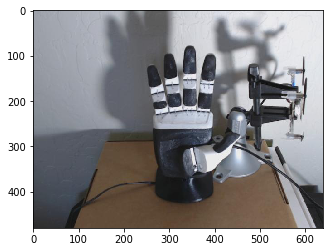

In [7]:
## Display the Brunel hand as it is now

payload = instance.get_snapshot_cam(format='ndarray')

if not payload['success']:
    time.sleep(1)
    payload = instance.get_snapshot_cam(format='ndarray')
    assert payload['success']

plt.imshow(payload['data'])

In [8]:
instance.start_sshclient()
instance.exec_ssh('pip install -U bhand pyserial')
print(str(instance.exec_ssh('bhand'), encoding='utf-8'))

Printing diagnostics. (Try `-h` for help.)

#
     System Diagnostics
____________________________

FW:	Beetroot V1.01
Board:	Chestnut
Hand:	Right
OnTime:	00:00:04:246
CPU Temp:	27.41'C
IMU Temp:	31.94'C
Errors:	No Errors
Mode:	None
Motors:	DISABLED




In [9]:
## Enable motors, and make fist

instance.exec_ssh('bhand --raw A3')
instance.exec_ssh('bhand --raw G0')
time.sleep(1)  # time for action to finish...

Sending command:  G0

G0
Grip:		Fist
Direction:	Close
Position:	100
Speed:		255




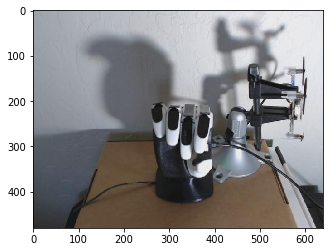

In [10]:
## Display the result

payload = instance.get_snapshot_cam(format='ndarray')
plt.imshow(payload['data'])

In [11]:
# Done!

instance.terminate()